### Fill out:
Name & Surname:

Student ID:

## W7&W8 post studio exercises (multivariate linear regression, regularisation)

Enter your solution in the cell(s) below each exercise. Add couple of inline comments explaining your code. Don't forget to add comments in markdown cell after each exercise. Missing comments (in markdown cells and/or inline) and late submissions will incur penalties.

Once done, drag&drop your python file to your ADS1002-name github account.

Copy url of this file on github to appropriate folder on Moodle by 09.30am prior your next studio. 

Solutions will be released later in the semester.

Max 10 marks - 2.5 marks per each exercise.

We will use diabetes data. Download this data from [the Gitlab site](https://gitlab.erc.monash.edu.au/bads/data-challenges-resources/-/tree/main/Machine-Learning/Supervised-Methods/Regression/Diabetes_Data.csv) into the same directory as the notebook on your computer. 

Run the following code from the pre-studio notebook.

In [18]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split # for splitting the data into training and testing sets
from sklearn.linear_model import LinearRegression # models we are going to use
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error # for comparing the predicted and test values
import seaborn as sns

In [20]:
df = pd.read_csv('Diabetes_Data.csv', usecols = range(0,11)) # read the Diabetes dataset in to a pandas dataframe
corrs = df.corr()          # calculate the correlation table
X = df.drop(['Y'],axis=1)  # Create a Dataframe without the target variable Y.
Y = df['Y']                # Extract a Series of the target Y values.

In [22]:
# The below code is identical to our first attempt, the only change is
# substituting nX for X in train_test_split, to use our normalised data.
nX =(X-X.mean())/X.std() # create nX, a normalised version of X

# Split into a training set with 80% of the data, and a testing set as the remainder.
X_train, X_test, Y_train, Y_test = train_test_split(
    nX, Y, test_size=0.2,
    random_state=np.random.RandomState(31287)  # Keeps the 'random' split consistent.
) 

# Construct and fit the model
linear = LinearRegression()  # Instantatiate the linear regression model
linear.fit(X_train,Y_train);  # Fit the model parameters to the training data.

In [24]:
from sklearn.model_selection import cross_validate, RepeatedKFold # import sklearn methods

# cross_validate takes the particular model, in this case linear regression which we instantatiated earlier,
# and undertakes a number of runs according the method specified by cv=
# RepeatedKFold splits the data into n sections and repeat the regression modelling 5 times, giving 25 runs
# return_estimator=True returns the fitting data for each run
scores = cross_validate(
    linear, nX, Y,
    cv=RepeatedKFold(n_splits=5, n_repeats=5, random_state=np.random.RandomState(2351786)),
    return_estimator=True,
)
# take the results for each simulation (estimator), extract the coefficients for each run 
# and add them to a dataframe with columns being the feature names
coefs = pd.DataFrame([est.coef_ for est in scores['estimator']],columns=nX.columns)

### Exercise 1 (correlation coefs vs linear regression coefs)

Compare the (mean of) model coefficients computed in the linear regression with the correlation scores found in the initial data analysis in pre-studio notebook. Choose any plot or table which you think is suitable for this comparison. Comment on whether the model fitting results are consistent with the correlation scores.

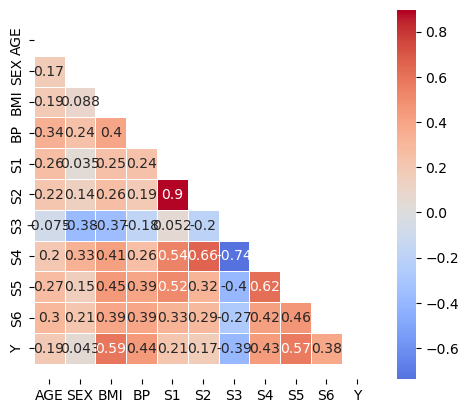

In [27]:
# Hint 1: Table of correlation coefficients and dataframe with reg. coefs from cross validation are given above.
# Hint 2: Create a dataframe which has the correlations with Y as a column, and then the 
# mean of coefficients computed from the cross_validate method for the other column.
# You will need to scale the coefficients in order to compare this with the correlations (divide by 30, for example). 
# Hint 3: A bar plot seems like a good idea!

corrs = df.corr() 
mask = np.triu(np.ones_like(corrs, dtype=bool)) 
f, ax = plt.subplots() 
sns.heatmap(corrs, mask=mask, center=0, annot=True, square=True, linewidths=.5, cmap='coolwarm' ) 
bottom, top = ax.get_ylim() 
ax.set_ylim(bottom + 0.5, top - 0.5);

In [28]:
X = df.drop(['Y'],axis=1) 
Y = df['Y'] 
nX =(X-X.mean())/X.std() 
feature_names = X.columns

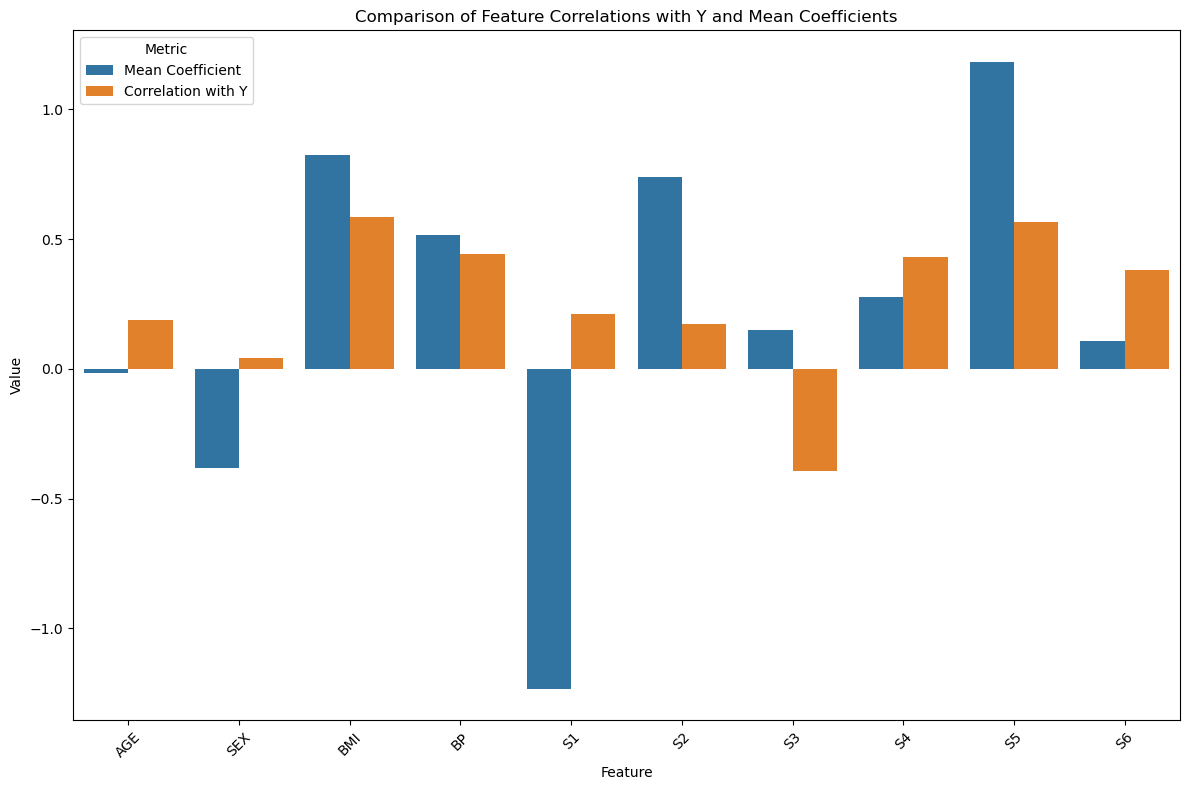

In [31]:
mean_coefs = coefs.mean()

# Create a DataFrame for comparison
comparison_df = pd.DataFrame({
    'Feature': mean_coefs.index,
    'Mean Coefficient': mean_coefs.values,
    'Correlation with Y': corrs['Y'].drop('Y')
})

# Normalize the mean coefficients for comparison
comparison_df['Mean Coefficient'] = comparison_df['Mean Coefficient'] / 30

# Set up the plot
plt.figure(figsize=(12, 8))

# Plot both correlations and coefficients
sns.barplot(x='Feature', y='value', hue='variable', data=pd.melt(comparison_df, id_vars=['Feature']))

plt.title('Comparison of Feature Correlations with Y and Mean Coefficients')
plt.xlabel('Feature')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.legend(title='Metric')
plt.tight_layout()

# Show the plot
plt.show()

In [33]:
# Compute correlation matrix
corrs = df.corr()

X = df.drop(['Y'], axis=1)
Y = df['Y']
nX = (X - X.mean()) / X.std()
feature_names = X.columns

mean_coefs = coefs.mean()  # Assume `coefs` is a DataFrame or Series

# Create DataFrame for comparison
comparison_df = pd.DataFrame({
    'Feature': mean_coefs.index,
    'Mean Coefficient': mean_coefs.values,
    'Correlation with Y': corrs['Y'].drop('Y')
})

# Normalize the mean coefficients for comparison
comparison_df['Mean Coefficient (Normalized)'] = comparison_df['Mean Coefficient'] / 30

# Melt DataFrame for plotting
comparison_df_melted = pd.melt(comparison_df, id_vars=['Feature'], var_name='Metric', value_name='Value')

# Display comparison table
import IPython.display as display
display.display(comparison_df)


,Feature,Mean Coefficient,Correlation with Y,Mean Coefficient (Normalized)
AGE,AGE,-0.499411,0.187889,-0.016647
SEX,SEX,-11.430949,0.043062,-0.381032
BMI,BMI,24.756913,0.586450,0.825230
BP,BP,15.459594,0.441482,0.515320
S1,S1,-37.031758,0.212022,-1.234392
S2,S2,22.222445,0.174054,0.740748
S3,S3,4.440452,-0.394789,0.148015
S4,S4,8.301175,0.430453,0.276706
S5,S5,35.506714,0.565883,1.183557
S6,S6,3.240609,0.382483,0.108020


BMI, BP, S5 have high correlation with Y and  high absolute mean coefficients (after normalization). This suggests that the model's coefficients align with the strength of the linear relationship as indicated by the correlations.
However, SEX, has low correlations with Y, thus low normalized coefficients. This supports the idea that the model is not assigning undue importance to features with weak relationships.

### Exercise 2 (coeeficient variability in a simpler model)

Try fitting a linear regression model to a subset of the features. To do this, select 3-4 columns from the normalised dataframe `nX` to use when constructing the train-test split, then fit the model parameters to this new training data as before. Describe how you selected your subset of features. Did the model coefficients for your chosen features turn out to be similar or different to those in the full model given in pre-studio notebook? (Comment on change in variability of the coefficients. If there is a difference, explain why.)

In [37]:
#Settings: 80-20 split, random state 31287.

#Aim is to show variability of corresponding coefficients 
#(train-test-split + cross validation + appropriate plot + compare to pre-studio)

# No regularisation yet.

features_subset = ['BMI', 'S2', 'BP', 'S5']
X_subset = nX[features_subset]
X = df.drop(['Y'],axis=1) # drop Y from our dataframe
Y = df['Y'] # create a dataframe with just the Y values
nX =(X-X.mean())/X.std() # create nX, a normalised version of X
feature_names = X.columns 

X_train, X_test, Y_train, Y_test = train_test_split(
    nX, Y,
    test_size=0.2,
    random_state=31287
) 

linear = LinearRegression() 
linear.fit(X_train, Y_train) 
training_score = linear.score(X_train, Y_train) 
preds_linear = linear.predict(X_test) 
rsquared_linear = r2_score(Y_test, preds_linear) 

# print the training and testing scores
print(f'Training score is {training_score:.3f}')
print(f'Testing score is {rsquared_linear:.3f}')

Training score is 0.530
Testing score is 0.448


In [39]:
subset_features = ['BMI', 'BP', 'S5', 'S6']
X_subset = nX[subset_features]
Y = df['Y']  # Target variable

# Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X_subset, Y, test_size=0.3, random_state=42)

# Fit the linear regression model
linear = LinearRegression()
linear.fit(X_train, Y_train)

# Get the coefficients from the subset model
subset_coefs = pd.Series(linear.coef_, index=X_subset.columns)
subset_intercept = linear.intercept_

# Predict and evaluate the model
Y_pred = linear.predict(X_test)
mse = mean_squared_error(Y_test, Y_pred)

# Print the results
print("Subset Model Coefficients:")
print(subset_coefs)
print("\nMean Squared Error on Test Set:", mse)

full_coefs = pd.Series(coefs.mean(), index=nX.columns) 

print("\nFull Model Coefficients:")
print(full_coefs)

normalized_full_coefs = full_coefs / 30
print("\nNormalized Full Model Coefficients:")
print(normalized_full_coefs)

Subset Model Coefficients:
BMI    31.465901
BP     14.397725
S5     20.182333
S6      2.616782
dtype: float64

Mean Squared Error on Test Set: 2826.538603805312

Full Model Coefficients:
AGE    -0.499411
SEX   -11.430949
BMI    24.756913
BP     15.459594
S1    -37.031758
S2     22.222445
S3      4.440452
S4      8.301175
S5     35.506714
S6      3.240609
dtype: float64

Normalized Full Model Coefficients:
AGE   -0.016647
SEX   -0.381032
BMI    0.825230
BP     0.515320
S1    -1.234392
S2     0.740748
S3     0.148015
S4     0.276706
S5     1.183557
S6     0.108020
dtype: float64


The chosen subset features were selected based on their correlation with the target variable. Comparing coefficients from the subset and full models helps in understanding feature importance and model strength. Differences in coefficients and variability reflect the impact of including or excluding features. The subset model might exhibit less variability due to fewer features and the omission of interactions present in the full model.

***
In W8 pre-studio notebook we found the optimal tuning parameters ($\alpha$) for both Ridge and Lasso regularisation via numerical experimentation. In practice however, the process of tuning and fitting a linear regression with Ridge or Lasso regularisation is automated through the functions `RidgeCV` and `LassoCV` respectively. When we call the .fit method for `RidgeCV`, cross-valiadation is implemented by performing Ridge linear regression over a variety of tuning parameters in order to determine the optimal tuning parameter $\alpha$. Once the optimal tuning parameter is found, the model can then be fit. In fact, we can extract the optimal tuning parameter $\alpha$ by calling .alpha_. A similar process is utilised for `LassoCV`.

N.B. Both Ridge and Lasso regularisation require the feature set to be normalised. 

### Exercise 3 (RidgeCV)

Here you will use `RidgeCV` from scikit-learn to perform Ridge linear regression and cross validation all in one go. Your tasks are the following:

1. Instantiate the RidgeCV model by calling RidgeCV (done for you).
2. Fit the model to the training data.
3. Determine the training and testing R2 scores.
4. Call .alpha_ in order to determine the optimal tuning parameter alpha.

The syntax here is essentially the same as any other machine learning algorithm from scikit-learn. If you have any issues, you can consult the scikit-learn guide on `RidgeCV`.

Do you get the same optimal tuning parameter alpha as obtained in this notebook? Any idea why that is or isn't the case?

In [44]:
from sklearn.linear_model import RidgeCV

# create an array of 21 alpha values logarithmically distributed between 10**(-2) and 10**2
alfas = np.logspace(-2, 2, num=21) 

X_train, X_test, Y_train, Y_test = train_test_split(
    nX, Y,
    test_size=0.2,
    random_state=1235
) 

ridgecv = RidgeCV(alfas, store_cv_values=True)

# Now you will need to fit the model on the train data using the instantiated model ridgecv, determine the training
# and testing R^2 scores, then call .alpha_ to find the optimal tuning parameter.

Training R² score: 0.531
Testing R² score: 0.452
Optimal alpha: 1.585


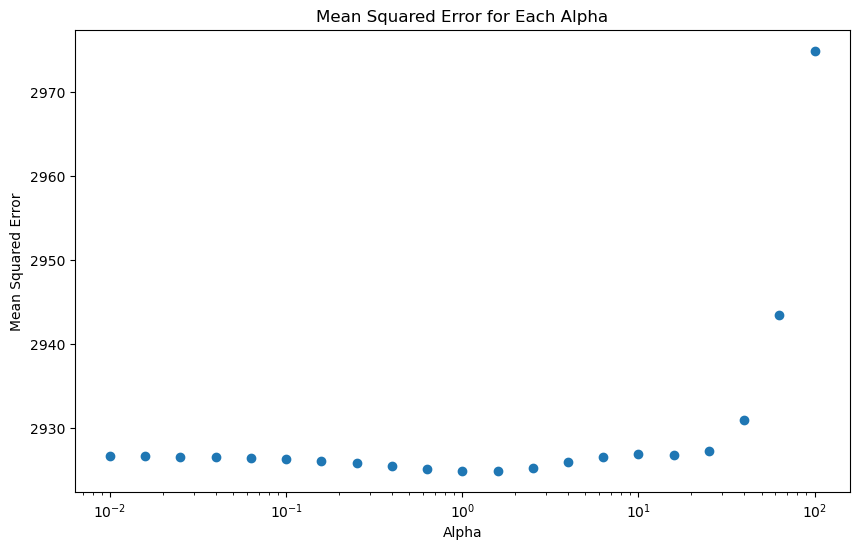

In [123]:
ridgecv.fit(X_train, Y_train)
Y_train_pred = ridgecv.predict(X_train)
Y_test_pred = ridgecv.predict(X_test)

# Calculate R² scores
training_r2 = r2_score(Y_train, Y_train_pred)
testing_r2 = r2_score(Y_test, Y_test_pred)

# Retrieve the optimal alpha
optimal_alpha = ridgecv.alpha_

# Print the results
print(f'Training R² score: {training_r2:.3f}')
print(f'Testing R² score: {testing_r2:.3f}')
print(f'Optimal alpha: {optimal_alpha:.3f}')

# Optional: If you want to visualize the cross-validation results
import matplotlib.pyplot as plt

# Extract the cross-validation scores
cv_values = ridgecv.cv_values_

# Plot the mean squared errors for each alpha
mean_cv_errors = np.mean(cv_values, axis=0)

plt.figure(figsize=(10, 6))
plt.scatter(alfas, mean_cv_errors, marker='o')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error for Each Alpha')
plt.show()

The inconsistency between the optimal alpha could be due to the processing of data may vary such as using different random seed.

### Exercise 4 (LassoCV)

Here you will use `LassoCV` from scikit-learn to perform Lasso linear regression and cross validation all in one go. Your tasks are the following:

1. Instantiate the LassoCV model by calling LassoCV (done for you).
2. Fit the model to the training data.
3. Determine the training and testing R2 scores.
4. Call .alpha_ in order to determine the optimal tuning parameter alpha.

The syntax here is essentially the same as any other machine learning algorithm from scikit-learn. If you have any issues, you can consult the scikit-learn guide on `LassoCV`.

Do you get the same optimal tuning parameter alpha as obtained in this notebook? Any idea why that is or isn't the case?

In [84]:
from sklearn.linear_model import LassoCV

# create an array of 21 alpha values logarithmically distributed between 10**(-2) and 10**2
alfas = np.logspace(-2, 2, num=21) 

X_train, X_test, Y_train, Y_test = train_test_split(
    nX, Y,
    test_size = 0.2,
    random_state = 1235
) 

lassocv = LassoCV(alphas = alfas)

# Now you will need to fit the model on the train data using the instantiated model lassocv, determine the training
# and testing R^2 scores, then call .alpha_ to find the optimal tuning parameter.

Training R² score: 0.532
Testing R² score: 0.451
Optimal alpha: 0.010


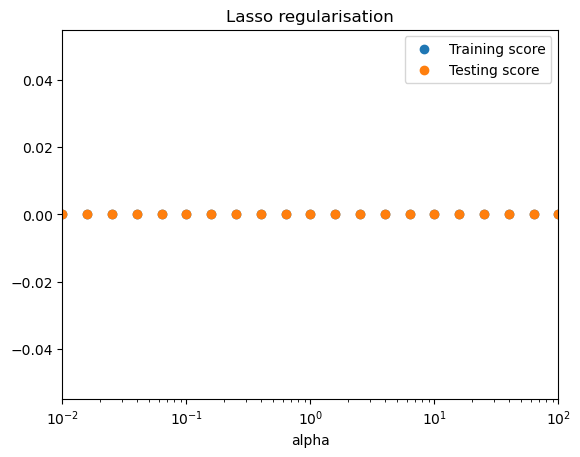

In [119]:
from sklearn.linear_model import LassoCV
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Create an array of alpha values
alfas = np.logspace(-2, 2, num=21)

# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(
    nX, Y,
    test_size=0.2,
    random_state=1235
)

# Instantiate LassoCV
lassocv = LassoCV(alphas=alfas, cv=5, random_state=1235)

# Fit the model
lassocv.fit(X_train, Y_train)

# Predict on training and testing data
Y_train_pred = lassocv.predict(X_train)
Y_test_pred = lassocv.predict(X_test)

# Calculate R² scores
training_r2 = r2_score(Y_train, Y_train_pred)
testing_r2 = r2_score(Y_test, Y_test_pred)

# Retrieve the optimal alpha
optimal_alpha = lassocv.alpha_

# Print results
print(f'Training R² score: {training_r2:.3f}')
print(f'Testing R² score: {testing_r2:.3f}')
print(f'Optimal alpha: {optimal_alpha:.3f}')

plt.scatter(alfas, lasso_training_score, label = 'Training score') # plot the training score against alpha
plt.scatter(alfas, lasso_rsquared, label = 'Testing score') # plot the testing score against alpha
plt.xscale('log') # make the x-axis a logarithmic scale
plt.gca().set_xlim(left = .01, right = 100); # fix the x-axis limits
plt.title('Lasso regularisation')
plt.xlabel('alpha');
plt.legend(loc='best');

## Extra exercises

The following exercises with (*) will not be assessed. Use these to check your understanding of topics covered in the past 2 weeks.

### Exercise 5* (coefficient variability vs multicolinearity)

Similarly to the beginning of this notebook, repeat the k-fold cross-validation test for coefficient variability, but first remove the feature 'S2' from the dataset. Observe the impact on the coefficients for the other features. In particular, look at the coefficient for 'S1'. You should see that the range of values produced for the S1 coefficient is much narrower. Can you think of a reason why this is the case (consider the mathematical form of the model)?